In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [3]:
fake = pd.read_csv('D:\\fake news detection\\Dataset\\Fake.csv')
real = pd.read_csv('D:\\fake news detection\\Dataset\\True.csv')

fake['label'] = 0  # F
real['label'] = 1  # R


In [4]:
df = pd.concat([fake, real], axis=0)
df = df[['text', 'label']].dropna()

print("Class distribution:\n", df['label'].value_counts())

Class distribution:
 label
0    23481
1    21417
Name: count, dtype: int64


In [5]:
X = df['text']
y = df['label']


In [6]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vectorized = tfidf.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_test)

print("\n=== Evaluation Metrics ===")
print("Accuracy Score     :", accuracy_score(y_test, y_pred))
print("Precision Score    :", precision_score(y_test, y_pred))
print("Recall Score       :", recall_score(y_test, y_pred))
print("F1 Score           :", f1_score(y_test, y_pred))




=== Evaluation Metrics ===
Accuracy Score     : 0.9844097995545658
Precision Score    : 0.9826086956521739
Recall Score       : 0.9844596185542736
F1 Score           : 0.9835332862855799


In [10]:
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4733
           1       0.98      0.98      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



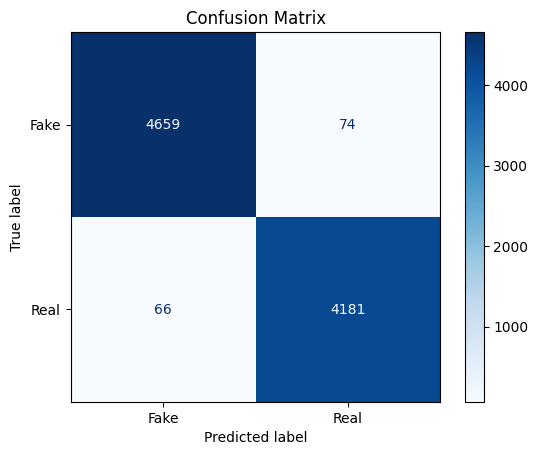

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [12]:
def predict_news(text):
    vector = tfidf.transform([text])
    prediction = model.predict(vector)[0]
    return "Fake News" if prediction == 0 else "Real News"


In [13]:
print("\nSample Prediction:")
sample_news = "Government announces new policy reforms for education sector."
print("Input:", sample_news)
print("Prediction:", predict_news(sample_news))



Sample Prediction:
Input: Government announces new policy reforms for education sector.
Prediction: Real News
